In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [10]:
sim = HathorSimulator(block_weight=24)

m0 = Miner(hashpower=50000)
sim.add_miner(m0)

#g1 = TxGenerator(tx_lambda=1/20., hashpower=10000)
#sim.add_tx_generator(g1)

In [11]:
sim.run(3600)

In [12]:
print(len(sim.blocks))
print(len(sim.transactions))

10
1


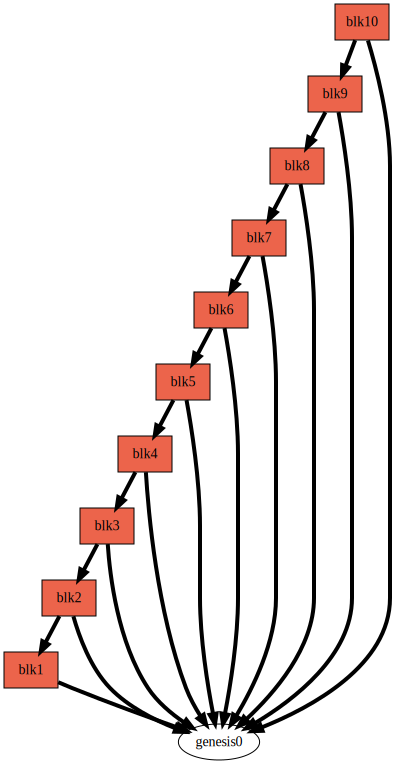

In [13]:
from graphviz import Digraph

dot = Digraph()
#dot.attr(rankdir='LR')
dot.attr(size='20,100')

g_blocks = dot.subgraph(name='blocks')
g_txs = dot.subgraph(name='txs')

dot.attr('node', shape='box', style='filled', fillcolor='#EC644B')
for i, blk in enumerate(sim.blocks):
    dot.node(blk.type + blk.name)

dot.attr('node', shape='oval', style='')

nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)
for i, tx in enumerate(nodes):
    if tx.type == 'blk':
        attrs = {'penwidth': '4'}
    else:
        attrs = {}
        
    for parent in tx.parents:
        dot.edge(tx.type+tx.name, parent.type+parent.name, **attrs)

dot

In [ ]:
print(dot.source)